In [ ]:
pip install scikit-learn

In [1]:
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats
from scipy.stats import t,norm
import numpy as np
import pandas as pd
import  statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion
from scipy.stats import chisquare,chi2_contingency
import scipy
from scipy import stats
import pylab
from pylab import plot,show,legend,title,xlabel,ylabel
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

In [3]:
# 1 sample z/t 
#to compare mean value with claim value

In [2]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='faithful')

In [3]:
x1 = df.waiting
y = df.eruptions

In [4]:
stats.linregress(x1,y)

LinregressResult(slope=0.07562794795186269, intercept=-1.8740159864107357, rvalue=0.9008111683218128, pvalue=8.129958506619089e-100, stderr=0.0022185414515176905, intercept_stderr=0.16014330230423848)

In [10]:
#y = m*x + c 
#y = eruptions, m = slope, x = waiting, c = intercept

In [15]:
x_train = df.waiting
y_train = df.eruptions

In [16]:
# here we are adding constant 1 to exist in form of y=mx+c
x_train = sm.add_constant(x_train, prepend=False)
x_train.head()

,waiting,const
0,79,1.0
1,54,1.0
2,74,1.0
3,62,1.0
4,85,1.0


In [13]:
# we are creating the model here
mod1 = sm.OLS(y_train,x_train).fit()

In [17]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 06 Jun 2024   Prob (F-statistic):          8.13e-100
Time:                        10:26:45   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0756      0.002     34.089      0.0

# Demo on faithfull when we have one predictor

In [85]:
272*0.8
df.count()

eruptions    272
waiting      272
dtype: int64

In [56]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='faithful')
x_train,x_test,y_train,y_test=train_test_split(df.waiting,df.eruptions, test_size=0.2)
x_train = sm.add_constant(x_train,prepend = False)
mod1 = sm.OLS(y_train,x_train).fit()

x_test = sm.add_constant(x_test,prepend=False)
y_pred=mod1.predict(x_test)

In [76]:
y_test.head()

222    1.750
230    4.083
267    4.117
150    5.033
93     4.817
Name: eruptions, dtype: float64

In [58]:
y_train[:5]

198    2.250
92     1.867
263    4.250
144    4.333
158    1.800
Name: eruptions, dtype: float64

In [60]:
x_train.head()

,waiting,const
198,51,1.0
92,50,1.0
263,83,1.0
144,76,1.0
158,53,1.0


In [83]:
y_pred.values

array([2.19537792, 3.40344392, 4.2339893 , 3.9319728 , 4.00747693,
       3.47894805, 1.8178573 , 2.64840267, 4.08298105, 2.57289855,
       4.91352643, 4.5360058 , 3.78096455, 4.68701405, 1.59134492,
       3.85646868, 4.08298105, 1.66684905, 4.38499755, 3.78096455,
       4.2339893 , 4.08298105, 2.79941092, 4.30949343, 3.3279398 ,
       3.85646868, 4.15848518, 4.00747693, 3.6299563 , 3.70546043,
       4.15848518, 4.00747693, 4.8380223 , 4.00747693, 2.57289855,
       2.34638617, 3.78096455, 4.46050168, 4.61150993, 1.59134492,
       4.2339893 , 4.2339893 , 5.06453468, 4.00747693, 2.49739442,
       4.38499755, 1.74235317, 2.19537792, 4.46050168, 2.19537792,
       3.70546043, 2.27088205, 2.57289855, 1.8178573 , 3.85646868])

In [86]:
y_test.values

array([1.75 , 4.083, 4.117, 5.033, 4.817, 3.717, 1.917, 2.25 , 4.433,
       1.983, 4.333, 4.583, 4.133, 3.5  , 2.15 , 4.8  , 3.95 , 2.35 ,
       4.167, 4.733, 4.8  , 3.6  , 2.283, 4.033, 3.067, 4.233, 4.033,
       4.567, 4.5  , 4.533, 4.517, 3.85 , 4.333, 4.767, 2.233, 1.967,
       4.15 , 4.8  , 4.183, 1.783, 4.333, 4.317, 4.4  , 4.6  , 2.   ,
       4.417, 1.867, 2.2  , 4.5  , 1.833, 4.35 , 1.967, 1.833, 2.1  ,
       4.15 ])

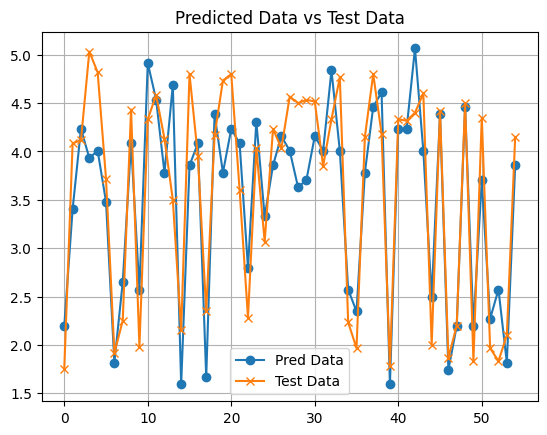

In [98]:
x_vals = range(len(y_pred))
plt.plot(x_vals,y_pred,label="Pred-Data",marker='o')
plt.plot(x_vals,y_test,label="Test-Data",marker='x')
plt.legend(['Pred Data','Test Data'])
plt.grid(True)
plt.title("Predicted Data vs Test Data")
plt.show()

## Another way to represent differences of predicted data

In [97]:
type(y_test)
dev = sum((y_test - y_pred)**2)
dev/len(y_test)

0.26856214481429763

In [32]:
df.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


In [99]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name = 'stackloss')
x_train,x_test,y_train,y_test=train_test_split(df.drop('StackLoss',axis=1),df.StackLoss, test_size=0.2)
x_train = sm.add_constant(x_train,prepend = False)
x_test = sm.add_constant(x_test,prepend=False)
mod2 = sm.OLS(y_train,x_train).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:              StackLoss   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     50.94
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           4.23e-07
Time:                        15:11:33   Log-Likelihood:                -34.671
No. Observations:                  16   AIC:                             77.34
Df Residuals:                      12   BIC:                             80.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AirFlow        0.9008      0.145      6.210      0.0

C:\Users\dheem\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


# Salaries files Predictors have multiple categories

In [5]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name = 'salaries')
df.head()

,rank,discipline,yrs_phd,yrs_service,gender,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
df = df[['yrs_service','gender','salary']]

In [151]:
df.head()

,yrs_service,gender,salary
0,18,Male,139750
1,16,Male,173200
2,3,Male,79750
3,39,Male,115000
4,41,Male,141500


In [157]:
print(df.dtypes)

yrs_service     int64
gender         object
salary          int64
dtype: object


In [7]:
#for creating dummy columns and dropping which category occurs alphabetically first and then taking them as reference (dropping them)
#gen_dummy = pd.get_dummies(df.gender, drop_first=True).astype(int)
gen_dummy = pd.get_dummies(df.gender, drop_first=True).astype(int)
gen_dummy

,Male
0,1
1,1
2,1
3,1
4,1
...,...
392,1
393,1
394,1
395,1


In [ ]:
#My attempt at filtering where male values are true to 1, but the column has a bool type 
#so we need to convert it to int 
gen_dummy.iloc[np.where(gen_dummy['Male']==True)[0]]=1

In [159]:
print(gen_dummy.dtypes)

Male    int32
dtype: object


In [8]:
df = df.drop('gender',axis=1)
df = pd.concat([df,gen_dummy],axis=1)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('salary',axis=1),df.salary, test_size=0.2)
x_train = sm.add_constant(x_train,prepend = False)
x_test = sm.add_constant(x_test,prepend=False)
mod3 = sm.OLS(y_train,x_train).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     27.94
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           6.78e-12
Time:                        21:25:29   Log-Likelihood:                -3688.7
No. Observations:                 317   AIC:                             7383.
Df Residuals:                     314   BIC:                             7395.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yrs_service   853.8044    123.055      6.938      

In [10]:
y_pred = mod3.predict(x_test)
y_pred.head()

379    106880.797605
198    128225.908587
231    112163.168269
328    108588.406483
54     109442.210923
dtype: float64

In [11]:
y_test.head()

379    104121
198    189409
231     73300
328     99247
54     103760
Name: salary, dtype: int64

In [13]:
y_pred.head()-y_test.head()

379     2759.797605
198   -61183.091413
231    38863.168269
328     9341.406483
54      5682.210923
dtype: float64

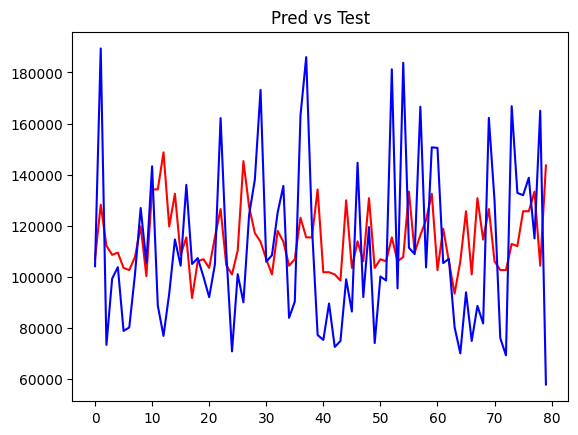

In [12]:
x_vals = range(len(y_pred))
plt.plot(x_vals,y_pred,label="Pred Data",color='r')
plt.plot(x_vals,y_test,label="Test Data",color='b')
plt.title("Pred vs Test")
plt.show()